<a href="https://colab.research.google.com/github/mborkhat/Data-Science-Projects/blob/master/EMAIL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [6]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [7]:

!kaggle datasets download -d veleon/ham-and-spam-dataset

 41% 5.00M/12.2M [00:01<00:02, 3.51MB/s]
100% 12.2M/12.2M [00:01<00:00, 7.93MB/s]


In [8]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham/1106.e8f11a2a435c86f57edaf08a726bb72a  
  inflating: ham/1107.7f3b20213d2397c966dfc7defebee2e7  
  inflating: ham/1108.128f9f0247b131505281874efc8e02f8  
  inflating: ham/1109.50269c75e11405ffa85a38881a36e166  
  inflating: ham/1110.607e74a3949cd6e4787031e0164f09ff  
  inflating: ham/1111.682637cab441c4614d42314d8c82c2c6  
  inflating: ham/1112.2e9833f8ba14f5c8fb76c35322ed4a8c  
  inflating: ham/1113.13231f60c358f003d7a4ee9c678bcf66  
  inflating: ham/1114.3ee361561ee25d914e377dd8473a9cb6  
  inflating: ham/1115.e88f46679ef431c8b88cafdd3d21b8ac  
  inflating: ham/1116.e30f22bbdea56cb1ba244a559564ddde  
  inflating: ham/1117.571c1399a9b49bf25062fcd2242d72f1  
  inflating: ham/1118.41f75976258428a527855201ced28007  
  inflating: ham/1119.ce22f4a2ffbc03cd2625cb10ba561058  
  inflating: ham/1120.bec3610a9fcdb3cf5c74d9e60bfbfa1d  
  inflating: ham/1121.51f7e5e557bde451a6b36e527211ed04  
  inflating: ham/1122.0306e263408d376

In [21]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download('words')
words = set(nltk.corpus.words.words())

from nltk.stem.porter import *

import email
import email.policy
from bs4 import BeautifulSoup 
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [22]:
ham_filenames = [name for name in sorted(os.listdir('/content/gdrive/My Drive/Kaggle/hamnspam/ham')) if len(name) > 30]
spam_filenames = [name for name in sorted(os.listdir('/content/gdrive/My Drive/Kaggle/hamnspam/spam')) if len(name) > 30]

print('Amount of ham files:', len(ham_filenames))
print('Amount of spam files:', len(spam_filenames))
print('Spam to Ham Ratio:',len(spam_filenames)/len(ham_filenames))

Amount of ham files: 2551
Amount of spam files: 501
Spam to Ham Ratio: 0.1963935711485692


In [23]:
def load_email(is_spam, filename):
    directory = "/content/gdrive/My Drive/Kaggle/hamnspam/spam" if is_spam else "/content/gdrive/My Drive/Kaggle/hamnspam/ham"
    with open(os.path.join(directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]
    
    
testEmail = spam_emails[500]

In [24]:
testEmail = spam_emails[499]

In [25]:
testEmail['Date']

'Mon, 07 Oct 2002 09:45:36 -0400'

In [28]:
print('Header Field Names:',testEmail.keys())
print('\n\n')
print('Message Field Values:',testEmail.values())
print('\n\n')
print('Message Content:',testEmail.get_content())

Header Field Names: ['Return-Path', 'Delivered-To', 'Received', 'Received', 'Received', 'Received', 'Received', 'Message-Id', 'To', 'From', 'Subject', 'Date', 'MIME-Version', 'X-Priority', 'X-Msmail-Priority', 'Reply-To', 'Content-Type', 'Content-Transfer-Encoding']



Message Field Values: ['<beautyinfufuxxxmeb13mxy@aol.com>', 'zzzz@localhost.jmason.org', 'from localhost (jalapeno [127.0.0.1])\tby zzzzason.org (Postfix) with ESMTP id EA07F16F19\tfor <zzzz@localhost>; Tue,  8 Oct 2002 11:02:07 +0100 (IST)', 'from jalapeno [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Tue, 08 Oct 2002 11:02:07 +0100 (IST)', 'from FUSMTA03-LRS (mta03.btfusion.com [62.172.195.12]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g983qgK31902 for    <webmaster@efi.ie>; Tue, 8 Oct 2002 04:52:42 +0100', 'from [217.36.117.194] (helo=firstloansdirect.co.uk) by    FUSMTA03-LRS with smtp (Exim 4.05) id 17ylQ4-000018-00; Tue,    08 Oct 2002 04:52:29 +0100', 'from 

In [29]:
testEmail.get_payload()

'<HTML>\n<BODY>\n  <tr valign=3D"top"> \n    <td height=3D"295" bgcolor=3D"#FFFFFF"> \n      <p align=3D"center"><font size=3D"4"><b>&quot;eBay - #1 Rated Work A=\nt Home Business \n        Opportunity&quot;<br>\n        - </b></font><b><font size=3D"4">PC Magazine</font></b></p>\n      <p align=3D"center"><font size=3D"3"><b>Fortunes are literally being=\n made in \n        this great new marketplace!</b></font></p>\n      <p align=3D"left">O<font size=3D"3"></font><font size=3D"3">ver <b>$=\n9 Billion</b> \n        in merchandise was sold on <b>eBay</b> in 2001 by people just like=\n you \n        - <u>right from their homes.</u></font></p>\n      <p align=3D"left"><font size=3D"3">Now you too can learn the secrets=\n of <b>successful \n        selling </b>on<b> eBay</b> and <b>make a staggering income</b> fro=\nm the \n        comfort of <b>your own home</b>. If you are <b>motivated</b>, capa=\nble \n        of having an<b> open mind</b>, and can follow simple directions, t=\nhen \n

In [30]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

def load_email_test(filename):
    with open(os.path.join(filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

def html_to_plain(email):
    try:
        soup = BeautifulSoup(email.get_content(), 'html.parser')
        return soup.text.replace('\n\n','')
    except:
        return "empty"

def email_to_plain(email):
    struct = get_email_structure(email)
    for part in email.walk():
        partContentType = part.get_content_type()
        if partContentType not in ['text/plain','text/html']:
            continue
        try:
            partContent = part.get_content()
        except: # in case of encoding issues
            partContent = str(part.get_payload())
        if partContentType == 'text/plain':
            return partContent
        else:
            return html_to_plain(part)

def check_for_spam_words(text):
    spam_words = ['please click','offer', 'free', 'congratulations', 'congrats', 
                    'shipping', 'visit website', 'increased', 'adclick', 
                    'fund', 'linux', 'million', 'won', 'lucky number', 'draws']
    text = text.lower()
    if any(word in text for word in spam_words):
        return 1
    return 0

def check_for_exclamation(text):
    return text.count('!')
  
def check_for_currency(text):
    return text.count('£') + text.count('$')

def count_uppercase(text):
    return sum(map(str.isupper, text.split()))

def count_spam_words(text):
    text = text.lower()
    if (text.count('congrats') + text.count('million') + text.count('free') + text.count('congratulations')) >= 3:
        return 1
    return 0

def isWeekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    return 0

In [31]:
def clean_mail(filename):
    t_email = load_email_test(filename)
    t_email_text = email_to_plain(t_email)
    t_email_type = get_email_structure(t_email)
    t_email_date = t_email['Date']

    dict_df = {'email_text': pd.Series(t_email_text), 
               'Date':pd.Series(t_email_date) ,
               'Mail_Type':pd.Series(t_email_type)}
    data = pd.DataFrame(dict_df)
    data['Date'] = pd.to_datetime(data['Date'].str[0:25], format='%a, %d %b %Y %H:%M:%S', errors='coerce')
    data['Mail_Type'] = LabelEncoder().fit_transform(data['Mail_Type'])

    input_df = pd.DataFrame()
    input_df['isSpamWords'] = data['email_text'].apply(lambda x: check_for_spam_words(x))
    input_df['numExclamation'] = data['email_text'].apply(lambda x: check_for_exclamation(x))
    input_df['Length'] = data['email_text'].str.len()
    input_df['numUppercaseWords'] = data['email_text'].apply(lambda x: count_uppercase(x))
    input_df['countCurrency'] = data['email_text'].apply(lambda x: check_for_currency(x))
    input_df['isRepeatedSpamWords'] = data['email_text'].apply(lambda x: count_spam_words(x))
    input_df['Weekday'] = data['Date'].dt.weekday
    input_df['Month'] = data['Date'].dt.month
    input_df['isWeekend'] = data['Date'].apply(lambda x: isWeekend(x))
    input_df['Mail_Type'] = data['Mail_Type']
    input_df = input_df.dropna()
    input_df = input_df.astype('int64')
    return input_df

In [32]:
ham_text = [email_to_plain(ham_emails[i]) for i in range(len(ham_emails))]
spam_text = [email_to_plain(spam_emails[i]) for i in range(310)]

ham_type = [get_email_structure(ham_emails[i]) for i in range(len(ham_emails))]
spam_type = [get_email_structure(spam_emails[i]) for i in range(310)]

spam_dates = [spam_emails[i]['Date'] for i in range(len(spam_emails)) if i < 310]
ham_dates = [ham_emails[i]['Date'] for i in range(len(ham_emails))]

data = pd.DataFrame({'email_text': ham_text, 'label':[0]*len(ham_emails), 'Date': ham_dates, 'Mail_Type':ham_type})
data = pd.concat([data, pd.DataFrame({'email_text': spam_text, 'label':[1]*310, 'Date': spam_dates, 'Mail_Type':spam_type})])

data['Mail_Type'] = LabelEncoder().fit_transform(data['Mail_Type'])

data['Date'] = pd.to_datetime(data['Date'].str[0:25], format='%a, %d %b %Y %H:%M:%S', errors='coerce')
data = data.sample(frac=1)
data = data.reset_index(drop=True)
data.head(10)

,email_text,label,Date,Mail_Type
0,"ATTN: President,\n\nFrom: Mrs.Helina karimu\n\...",1,2002-08-23 22:46:34,5
1,---------- Forwarded message ----------\nFrom:...,0,2002-08-26 17:33:21,20
2,Ah yes..\n\nYet another case where 'marriage' ...,0,2002-09-05 23:16:59,20
3,"Oh, they were plenty upset about the tea taxes...",0,2002-09-22 15:32:34,20
4,\nThis just blew my mind:\nhttp://www.earthvie...,0,2002-09-04 16:27:56,20
5,Digital Publishing Tools - Free Software Alert...,1,2002-08-29 13:24:26,19
6,Hello again. I tried all the suggestions for t...,0,2002-09-05 15:17:36,20
7,"At 12:01 PM -0700 on 9/17/02, James Rogers wro...",0,2002-09-17 17:26:09,20
8,URL: http://scriptingnews.userland.com/backiss...,0,2002-09-25 08:00:23,20
9,In article <E17tS0T-0001zD-00@rds059> you writ...,0,2002-09-27 20:10:02,20


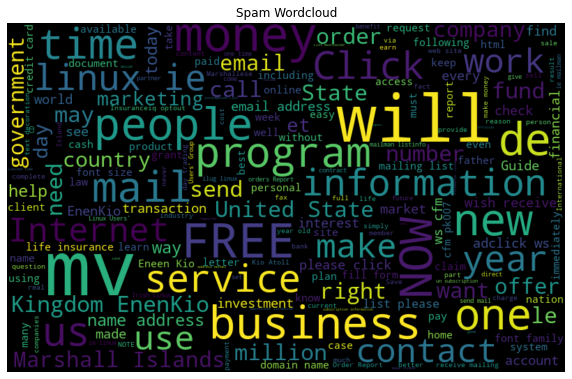

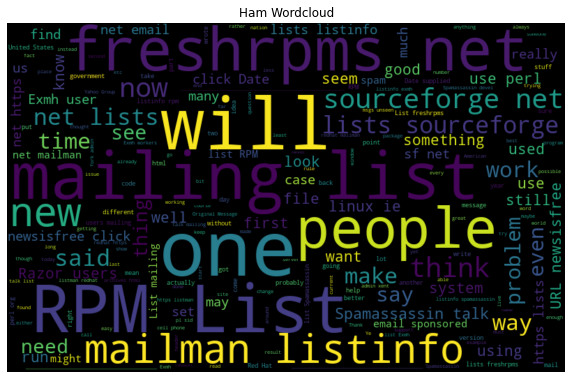

In [33]:
from wordcloud import WordCloud

spam = data[data['label'] == 1]
ham = data[data['label'] == 0]

all_words = ' '.join([text for text in spam['email_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Spam Wordcloud')
plt.axis('off')
plt.show()
all_words = ' '.join([text for text in ham['email_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Ham Wordcloud')
plt.axis('off')
plt.show()

In [34]:
input_df = pd.DataFrame()
input_df['isSpamWords'] = data['email_text'].apply(lambda x: check_for_spam_words(x))
input_df['numExclamation'] = data['email_text'].apply(lambda x: check_for_exclamation(x))
input_df['Length'] = data['email_text'].str.len()
input_df['numUppercaseWords'] = data['email_text'].apply(lambda x: count_uppercase(x))
input_df['countCurrency'] = data['email_text'].apply(lambda x: check_for_currency(x))
input_df['isRepeatedSpamWords'] = data['email_text'].apply(lambda x: count_spam_words(x))
input_df['Weekday'] = data['Date'].dt.weekday
input_df['Month'] = data['Date'].dt.month
input_df['isWeekend'] = data['Date'].apply(lambda x: isWeekend(x))
input_df['Mail_Type'] = data['Mail_Type']
input_df['label'] = data['label']
input_df = input_df.dropna()
input_df = input_df.sample(frac=1).reset_index(drop=True)
input_df = input_df.astype('int64')
input_df.head(10)

,isSpamWords,numExclamation,Length,numUppercaseWords,countCurrency,isRepeatedSpamWords,Weekday,Month,isWeekend,Mail_Type,label
0,0,0,390,1,0,0,1,9,0,20,0
1,1,0,711,4,0,0,2,10,0,20,0
2,1,0,620,4,0,0,2,9,0,20,0
3,0,0,733,1,0,0,1,9,0,20,0
4,1,0,1293,2,0,0,0,9,0,20,0
5,1,10,1711,13,3,0,6,9,1,19,1
6,1,55,2849,109,14,1,3,8,0,20,1
7,0,0,1103,11,0,0,4,8,0,15,0
8,1,0,695,4,1,0,3,10,0,20,0
9,1,0,2892,34,3,0,4,9,0,20,1


In [35]:
pd.crosstab(input_df['isSpamWords'],input_df['label'])

label,0,1
isSpamWords,,
0,1382,97
1,1169,202


In [36]:
input_df.isnull().sum()

isSpamWords            0
numExclamation         0
Length                 0
numUppercaseWords      0
countCurrency          0
isRepeatedSpamWords    0
Weekday                0
Month                  0
isWeekend              0
Mail_Type              0
label                  0
dtype: int64

In [37]:
input_df['label'].value_counts()

0    2551
1     299
Name: label, dtype: int64

In [38]:
input_df.columns

Index(['isSpamWords', 'numExclamation', 'Length', 'numUppercaseWords',
       'countCurrency', 'isRepeatedSpamWords', 'Weekday', 'Month', 'isWeekend',
       'Mail_Type', 'label'],
      dtype='object')

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [40]:
X = input_df.drop(["label"], axis=1)
y = input_df["label"]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [42]:
X_train.shape

(2280, 10)

In [63]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       508
           1       0.79      0.66      0.72        62

    accuracy                           0.94       570
   macro avg       0.87      0.82      0.84       570
weighted avg       0.94      0.94      0.94       570

[[497  11]
 [ 21  41]]


In [44]:

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt.predict(X_test)))

Accuracy Score on train data:  0.9543859649122807
Accuracy Score on the test data:  0.9438596491228071


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


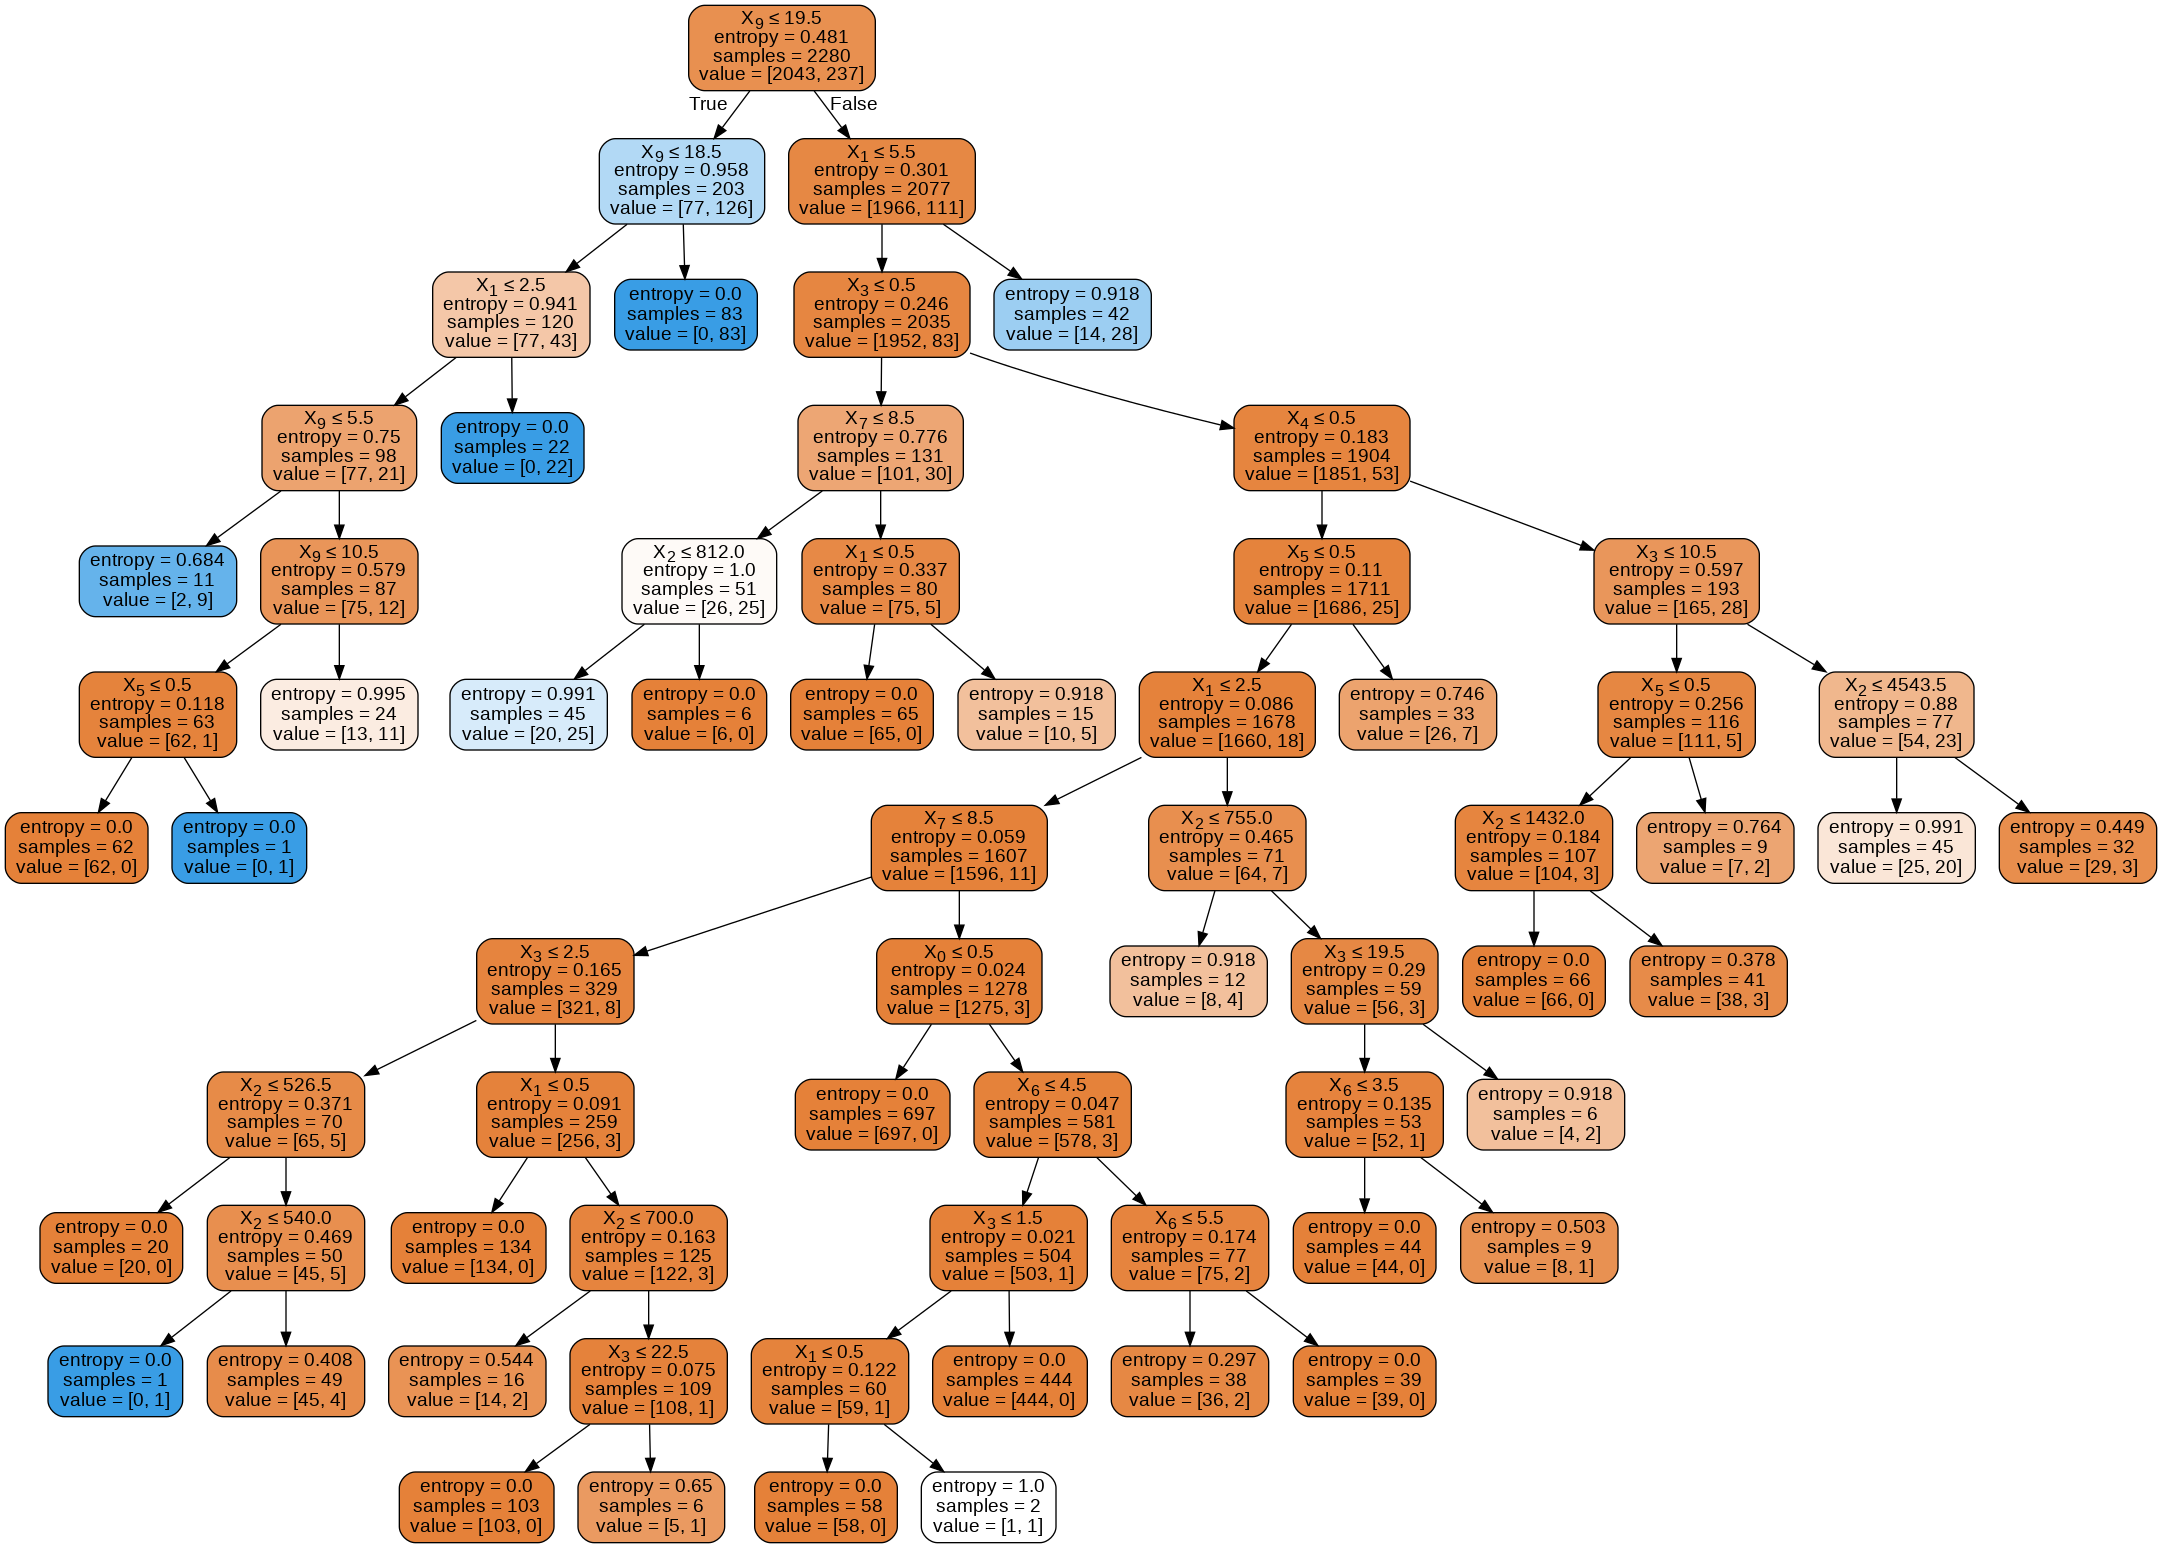

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)

In [48]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93
Accuracy of logistic regression classifier on test set: 0.91


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       541
           1       0.34      0.72      0.46        29

    accuracy                           0.91       570
   macro avg       0.66      0.82      0.71       570
weighted avg       0.95      0.91      0.93       570

[[500   8]
 [ 41  21]]


In [60]:
mail_title = []
predictions = []
actual=[0,1,1,1,1,1,0,0,0,0]
for name in sorted(os.listdir('/content/gdrive/My Drive/Kaggle/hamnspam/test_email/')):
    mail_title.append(name)
    testing_mail = clean_mail('/content/gdrive/My Drive/Kaggle/hamnspam/test_email/'+name)
    predictions.append(logreg.predict(testing_mail).tolist())

output_df = pd.DataFrame({'Mail Subject': mail_title, 
                          'Google Mail Classification': actual,
                          'Logistic Reg. Predictions': sum(predictions, [])})
output_df['Google Mail Classification'] = np.where(output_df['Google Mail Classification'] == 0, "Ham", "Spam")
output_df['Logistic Reg. Predictions'] = np.where(output_df['Logistic Reg. Predictions'] == 0, "Ham", "Spam")

In [65]:
mail_title = []
predictions = []
for name in sorted(os.listdir('/content/gdrive/My Drive/Kaggle/hamnspam/test_email/')):
    mail_title.append(name)
    testing_mail = clean_mail('/content/gdrive/My Drive/Kaggle/hamnspam/test_email/'+name)
    predictions.append(dt.predict(testing_mail).tolist())

output_df['Decision Tree Predictions'] = np.where(np.array(sum(predictions, [])) == 0, "Ham", "Spam")




In [70]:
output_df

,Mail Subject,Google Mail Classification,Logistic Reg. Predictions,Decision Tree Predictions
0,"Apply to jobs at Nelito Systems Ltd, sapwood v...",Ham,Ham,Spam
1,CONGRATULATIONS!!!!! you WON $50000.eml,Spam,Spam,Spam
2,Earn MILLIONS!! Join NOW.eml,Spam,Spam,Ham
3,FREE !!!!! Hurry.eml,Spam,Spam,Spam
4,FREEE!! DRIVING LICENSE.eml,Spam,Spam,Spam
5,"It’s free, grab it now!.eml",Spam,Ham,Ham
6,Municipal website.eml,Ham,Ham,Ham
7,My App apk.eml,Ham,Spam,Spam
8,mini project.eml,Ham,Ham,Ham
9,research gate.eml,Ham,Ham,Ham
